In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [13]:
data = pd.read_csv("/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/github/AlgoTrading/Part3_Materials/intraday.csv", parse_dates=["time"], index_col="time")

In [14]:
window = 3

In [15]:
data["returns"] = np.log(data.div(data.shift(1)))

In [16]:
data["position"] = -np.sign(data["returns"].rolling(window).mean()) # Contrarian

In [17]:
data["strategy"] = data["position"].shift(1) * data["returns"]

In [18]:
data.dropna(inplace=True)

In [19]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

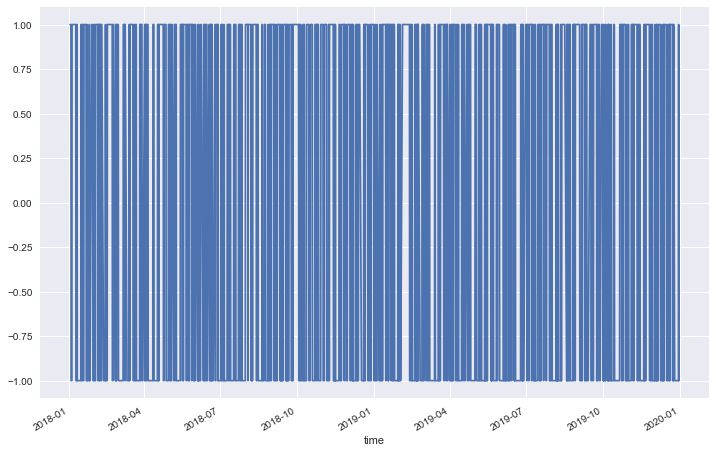

In [20]:
data.loc[:, "position"].plot(figsize=(12,8))
plt.show()

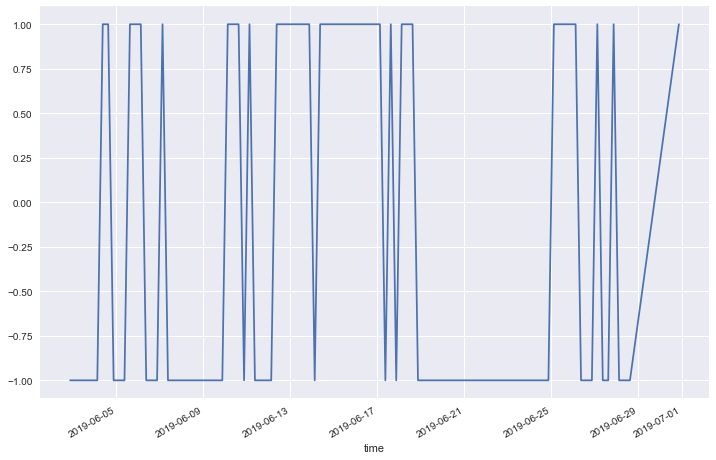

In [22]:
data.loc["2019-06", "position"].plot(figsize=(12,8))
plt.show()

# Trading/Transaction Costs